In [1]:
import sys
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
import scipy as sp
from scipy import stats, integrate
import matplotlib.ticker as tk
import matplotlib as mpl
import os

sys.path.append('/home/jtb34/GitHub/GACF/')
from NGTS.NGTS_Field import return_field_from_object_directory, NGTSField
from NGTS.GACF_utils import TIME_CONVERSIONS, medsig, rebin_err, 
from NGTS import NGTSObject

from ngtsio import ngtsio

from tqdm import tqdm as tqdm

In [212]:
import numpy.fft as fft
import peakutils
def fourier_transform_and_peaks(correlations, lag_timeseries, len_ft=None):
    if len_ft is None:
        len_ft = len(lag_timeseries)
 
    complex_ft = fft.rfft(correlations, n=len_ft)
    freqs = fft.rfftfreq(len_ft, lag_timeseries[1] - lag_timeseries[0])

#     periods = 1 / freqs 
    ft = np.abs(complex_ft)

    # Find peaks of FFT

    indexes = peakutils.indexes(ft, thres=0.1,  # Fraction of largest peak
                                min_dist=5  # Number of data points between
                                )

    return ft, freqs, indexes

In [223]:
timeseries = np.linspace(0, 200, 1000)
flux = np.sin(timeseries * (2. * np.pi / 24.6))

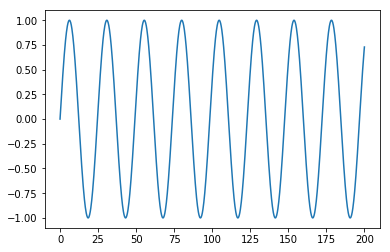

In [224]:
plt.plot(timeseries, flux)
plt.show()

In [225]:
ft, freqs, indexes = fourier_transform_and_peaks(flux, timeseries)

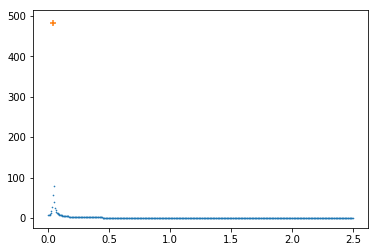


	 divide by zero encountered in divide



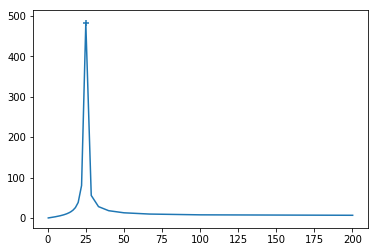

In [226]:
plt.scatter(freqs, ft, s=0.4)
plt.scatter(freqs[indexes], ft[indexes], marker='+')
plt.show()

periods = 1.0 / freqs
plt.plot(periods, ft)
plt.scatter(periods[indexes], ft[indexes], marker='+')
plt.show()


In [227]:
print  1.0 / freqs[indexes]
print ft[indexes]

[25.02502503]
[481.60417854]


In [30]:
sampling_freq_20_min = 1.0 / (20.0 * TIME_CONVERSIONS['m2d'])
sampling_freq_20_min

72.0

In [33]:
timeseries[-1] - timeseries[0]

100.0

In [194]:
from NGTS.GACF_utils import create_phase

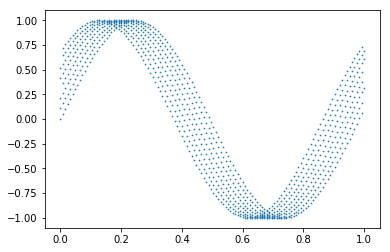

In [206]:
phase = create_phase(timeseries, (1.0 / freqs[indexes])[0], epoch=0)
# phase = create_phase(timeseries, np.random.randn(), epoch=0)
plt.scatter(phase, flux, s=0.5)
plt.show()